In [3]:
import numpy as np
import matplotlib.pyplot as plt


### Créer un signal u(t) impulsion périodique avec to= T/2 d'amplitude E
créer un vecteur t=[0, pas, T]

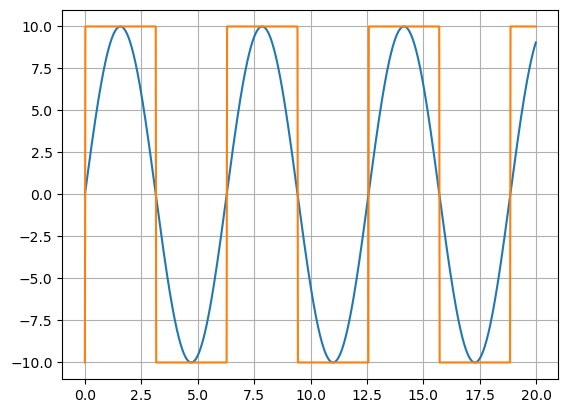

In [18]:
T=20     #période du signal
to=T/2   #demi-période pour onde carrée
E=10     #amplitude

t=np.arange(0, T, T/1000)   #vecteur temps avec un pas de T/1000

def signal(t):
    u=[]
    for i in range(len(t)):
        if np.pi * 2* np.sin(t[i])*(1/T) >0:
            u.append(E)
        else:
            u.append(-E)
    return(u)

plt.plot(t, E*np.sin(t))
plt.plot(t, signal(t))
plt.grid(True)
plt.show()


### Tracer en fonction du temps et "vérifier"

### Algo de Faurier u(t) -> (a0, an, bn)

In [12]:
# Calcul des coefficients
periode = np.linspace(0, T, 1000)  # Création des temps sur une période
pas = periode[1] - periode[0]      # Pas

# Fonctions coefficients
def a(n):
    return sum(signal(periode) * np.cos(2 * np.pi * n * periode / T) * pas) * 2 / T * (1 / 2 * (n == 0) + 1 * (n != 0))

def b(n):
    return sum(signal(periode) * np.sin(2 * np.pi * n * periode / T) * pas) * 2 / T


### Tracer le spectre de puissance (cn²/to) en fonction de n

In [25]:
def v(t, n=1):
    def cst(t0):
        return a(0)
    vi = cst(t)
    for i in range(1, n+1):
        vi += a(i) * np.cos(2 * np.pi * i * t / T) + b(i) * np.sin(2 * np.pi * i * t / T)
    return vi
        

### Reconstruire le signal avec N harmoniques, Comparer avec u(t)

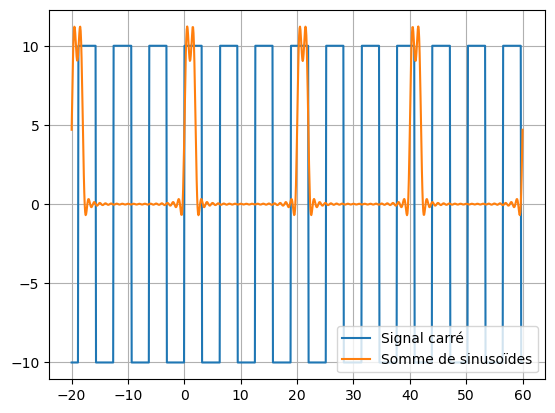

In [26]:
tps = np.linspace(-T, 3 * T, 1000)
U = signal(tps)
V = v(tps, 20)
plt.plot(tps, U, label='Signal carré')
plt.plot(tps, V, label='Somme de sinusoïdes')
plt.grid(True)
plt.legend()
plt.show()